# REGRESSION ANALYSIS
 
Regression analysis marks the first step in predictive modeling.
No doubt, it’s fairly easy to implement. 
Neither it’s syntax nor its parameters create any kind of confusion.
But, merely running just one line of code, doesn’t solve the purpose.
Neither just looking at R² or MSE values. Regression tells much more than that!

For model improvement, you also need to understand regression assumptions
and ways to fix them when they get violated.
 
ASSUMPTIONS OF LINEAR REGRESSION

1.There should be a linear and additive relationship between dependent (response) variable and independent (predictor) variable(s). A linear relationship suggests that a change in response Y due to one unit change in X¹ 
is constant, regardless of the value of X¹. An additive relationship suggests that the effect of X¹ on Y is independent of other variables.

2.There should be no correlation between the residual (error) terms.This phenomenon is known as        Autocorrelation. For this we use Durbin-Watson Statistic.

3.The independent variables should not be correlated. Absence of this phenomenon is known as multicollinearity.

4.The error terms must have constant variance. This phenomenon is known as homoskedasticity. The presence of non-   constant variance is referred to heteroskedasticity.

5.The error terms must be normally distributed




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
from scipy import stats
%matplotlib inline
sns.set()
# Importing Regression Modules
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
# Importing Bagging and Bosoting Regressor Modules

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# For Grid Search
from sklearn.model_selection import GridSearchCV

#Importing Evaluation metric
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import confusion_matrix,r2_score
from sklearn.model_selection import cross_val_score

#importing visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

In [2]:
df=pd.read_csv('house/train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

in order to understand our data,we can look at each variable and and try to understand their meaning and 
their relevance to the problem.This surely is time consuming but this makes your model more powerful 
and reliable.

In [6]:
Y=df['SalePrice']

In [7]:
from sklearn.model_selection import train_test_split
df_train, df_test, y_train, y_test = train_test_split( df, Y, test_size=0.20, random_state=42)

In [8]:
print(df_train.shape)
print(df_test.shape)

(1168, 81)
(292, 81)


First Things First,Let's analyze the SalePrice,'SalePrice'is the reason of our quest.

In [9]:
df_train['SalePrice'].describe()

count      1168.000000
mean     181441.541952
std       77263.583862
min       34900.000000
25%      130000.000000
50%      165000.000000
75%      214925.000000
max      745000.000000
Name: SalePrice, dtype: float64

/home/sanjay/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


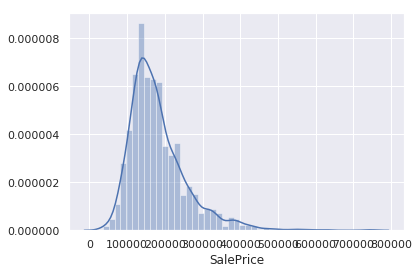

In [10]:
#Very well... It seems that your minimum price is larger than zero. 
#Excellent! You don't have one of those personal traits that would destroy my model!
sns.distplot(df_train['SalePrice'])

In [11]:
#as we can see the variable saleprice is not normally distributed and it is skewed
#which doesn't follow the assumption of linear regression,thus to make the good model we have to make 
#sure that all variables are normally distributed

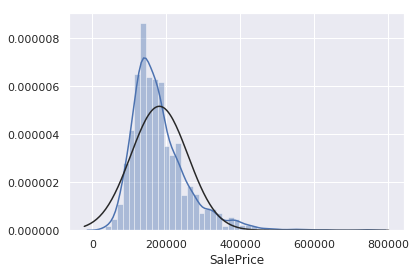

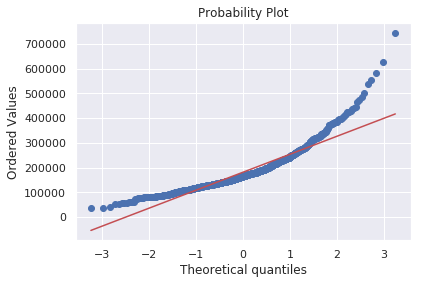

In [12]:
from scipy.stats import norm
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

Ok, 'SalePrice' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line.
But everything's not lost. A simple data transformation can solve the problem. 
This is one of the awesome things you can learn in statistical books: 
in case of positive skewness, log transformations usually works well. 
but before doing transformation let's explore data a bit more

let's explore the independent variables relationship with the SalePrice

In [13]:
numerical_feats=df_train.dtypes[df_train.dtypes!='object'].index
categorical_feats=df_train.dtypes[df_train.dtypes=='object'].index

In [14]:
numerical_feats

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [15]:
categorical_feats

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

For better visualization of numeric variables relationship with SalePrice we will use the Scatter plot
 and for Categorical we will use the BoxPlots

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

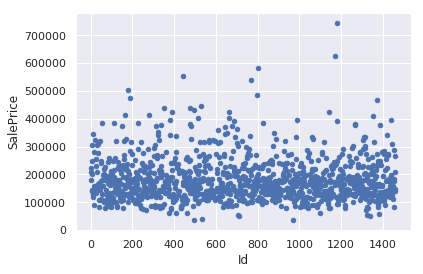

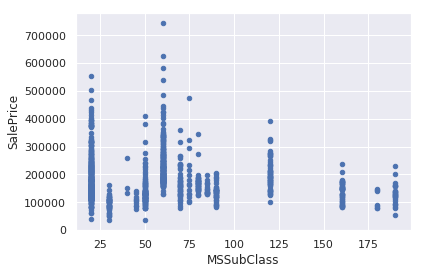

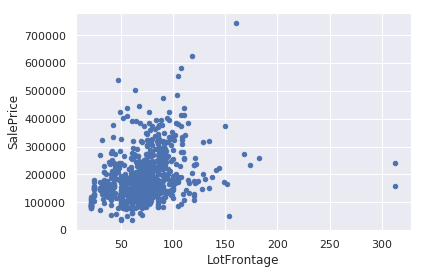

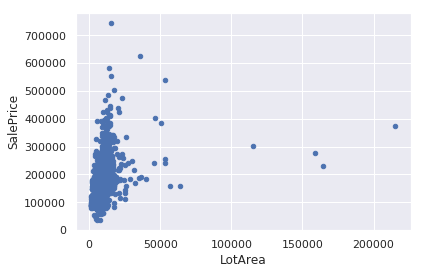

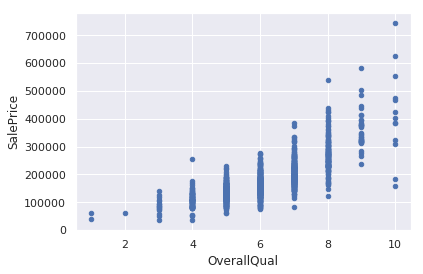

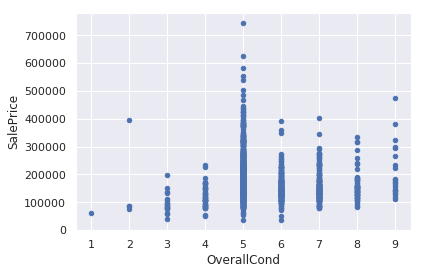

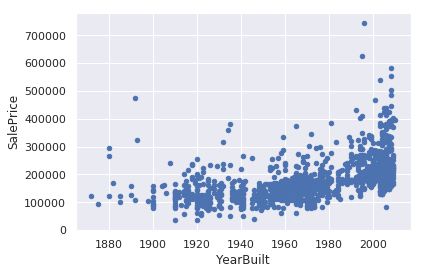

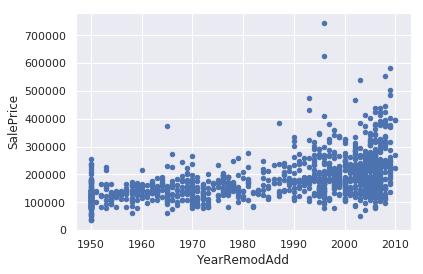

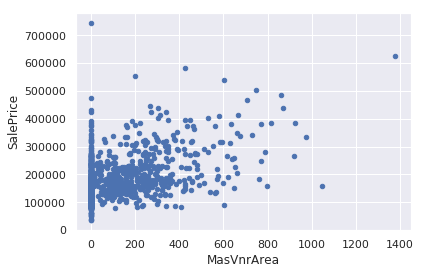

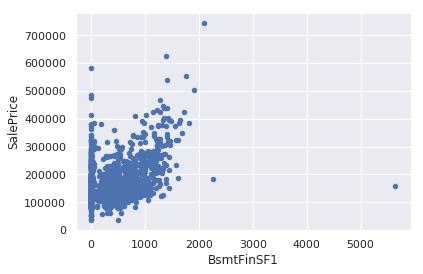

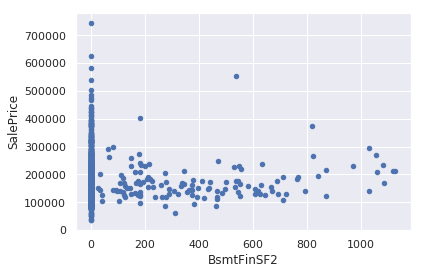

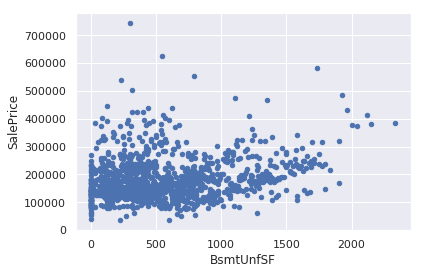

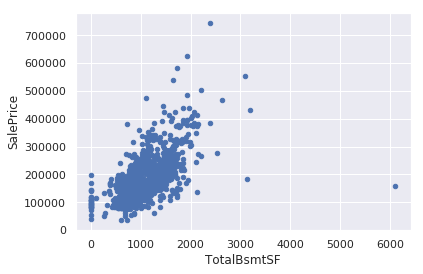

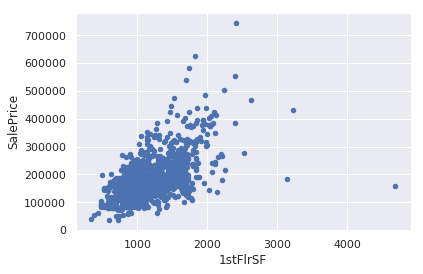

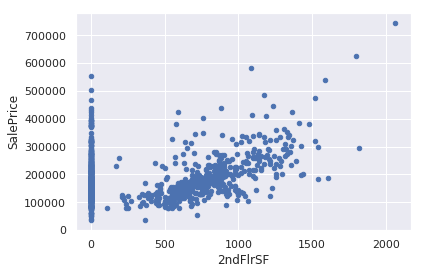

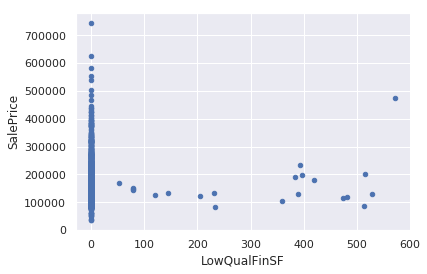

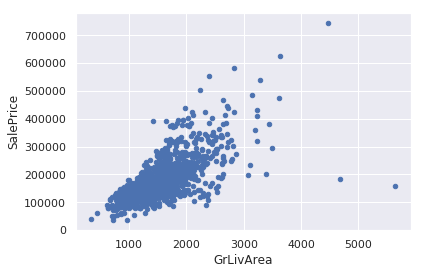

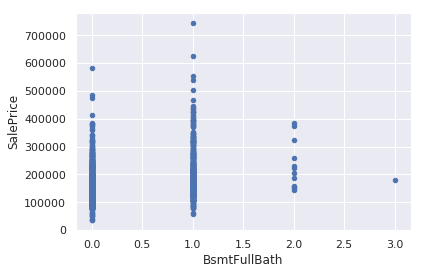

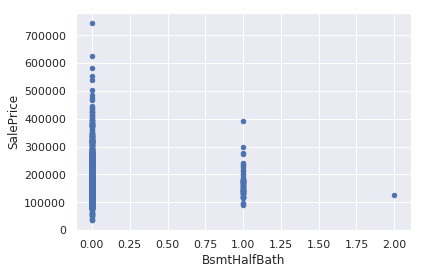

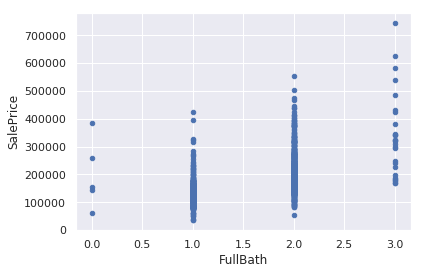

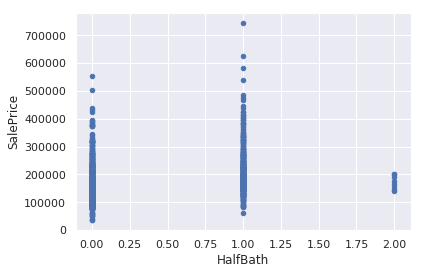

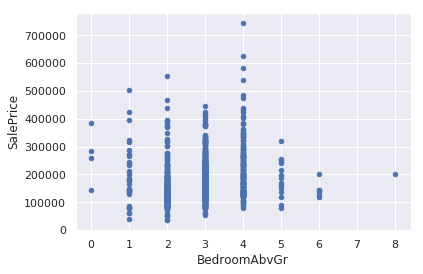

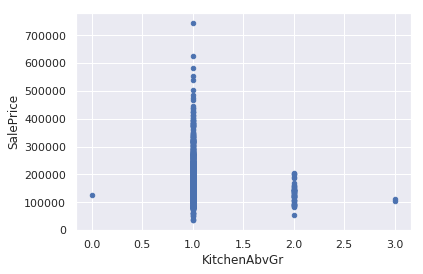

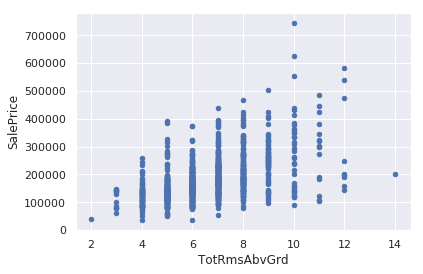

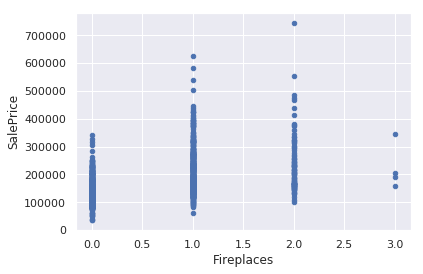

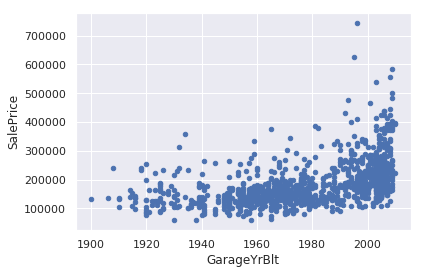

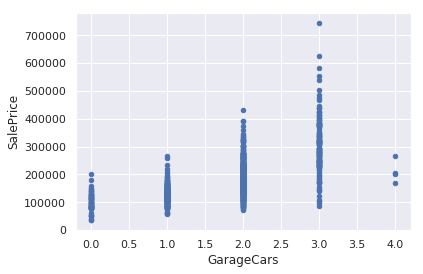

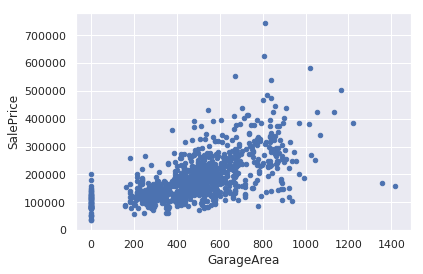

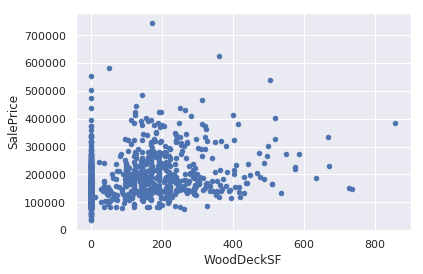

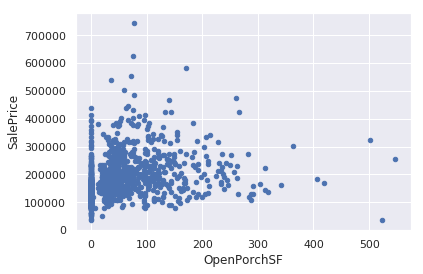

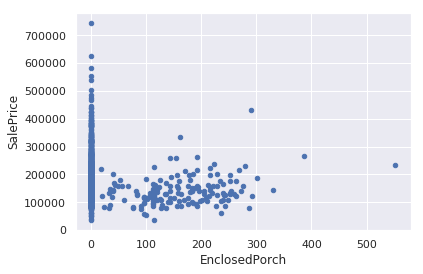

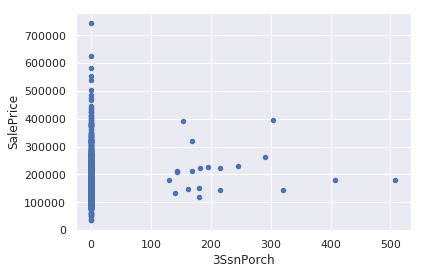

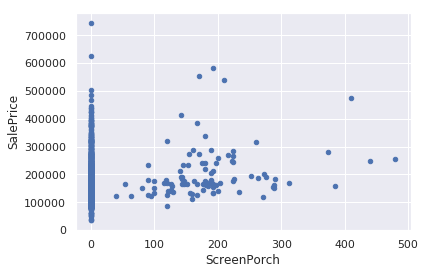

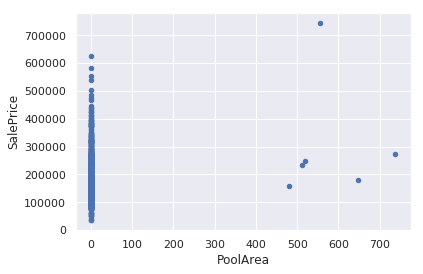

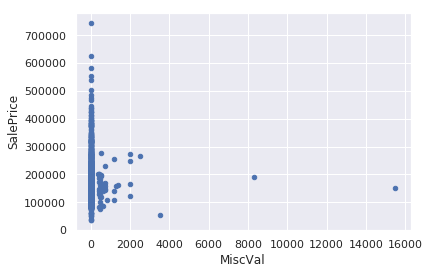

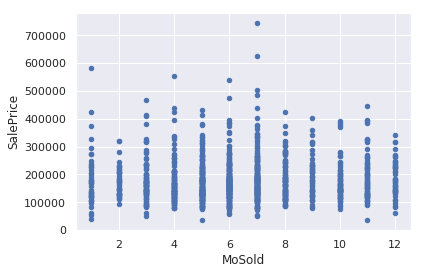

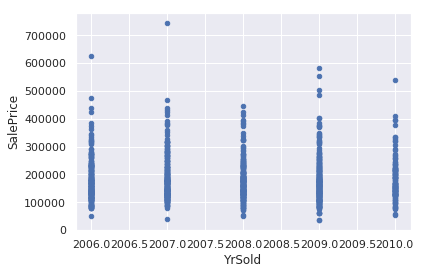

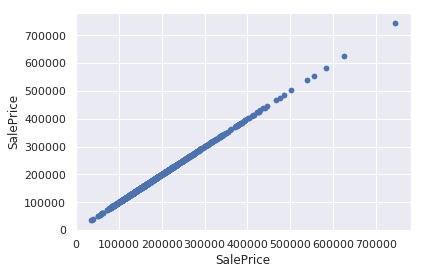

In [16]:
for var in numerical_feats:
    data=pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
    data.plot.scatter(x=var, y='SalePrice');

In [17]:
#there are both numeric discrete and numeric continous values
numeric_dis=['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
            'KitchenAbvGr','TotRmsAbvGrd','FirePlaces','GargageCars']

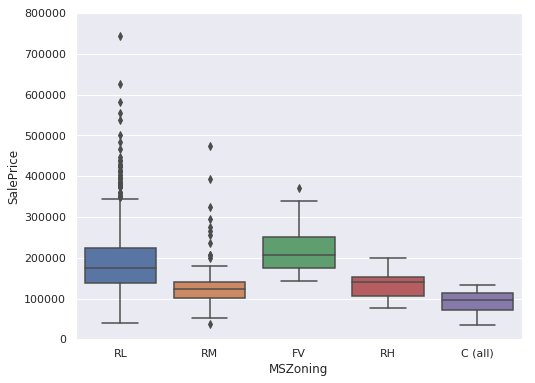

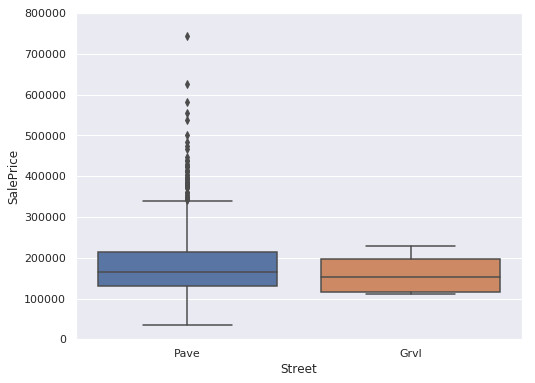

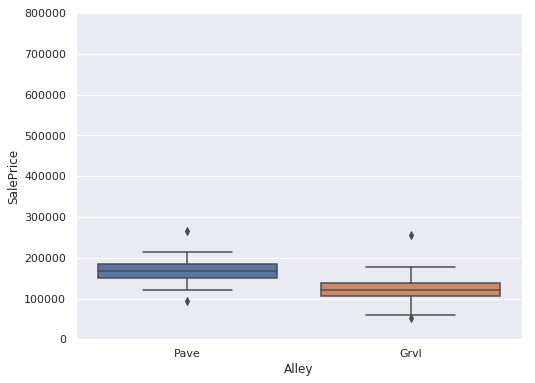

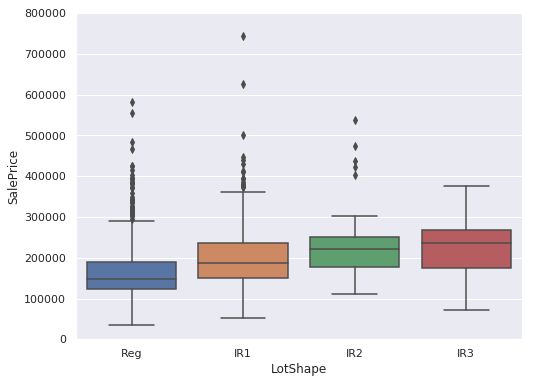

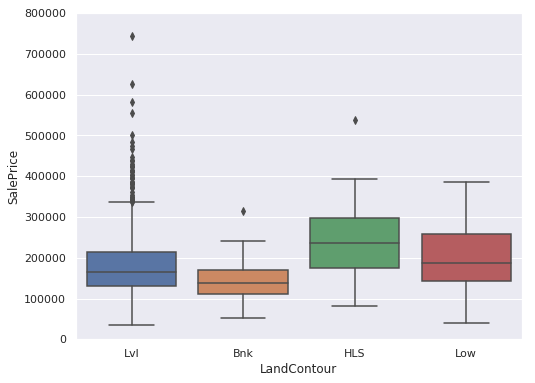

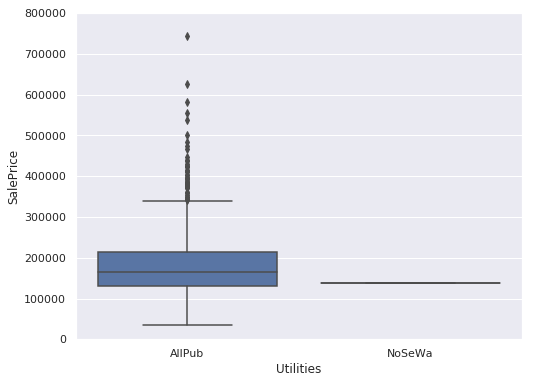

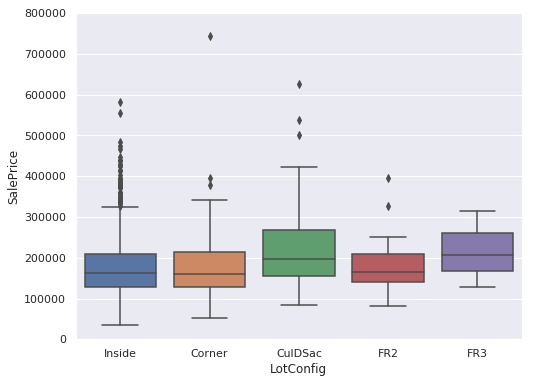

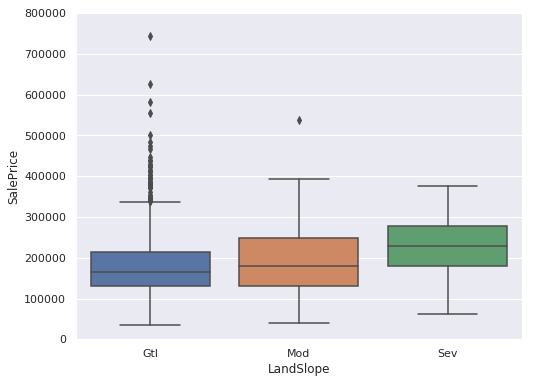

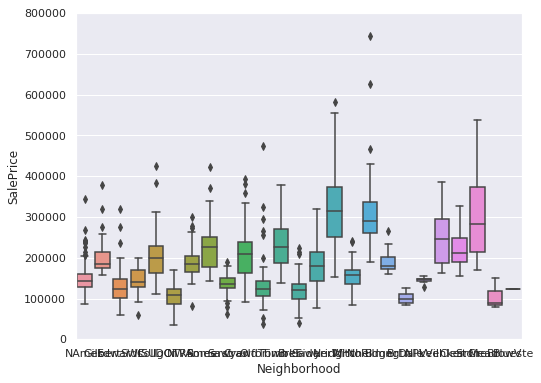

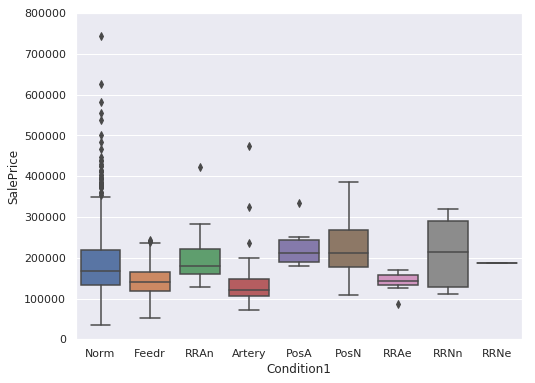

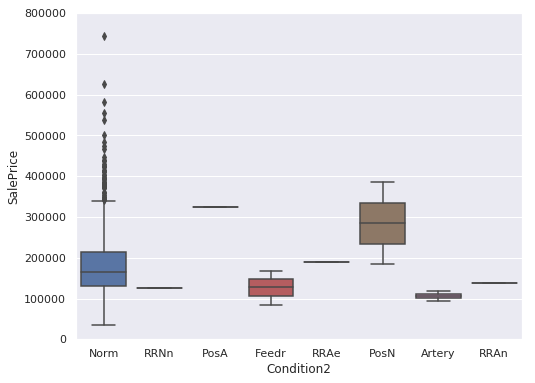

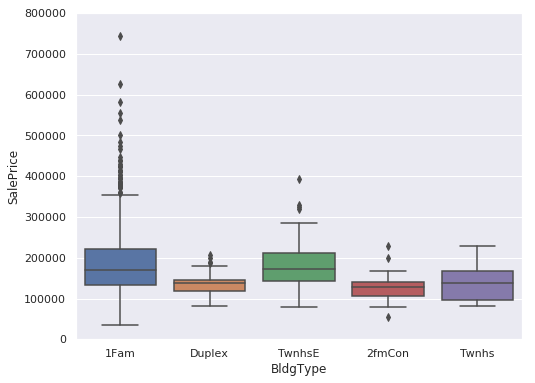

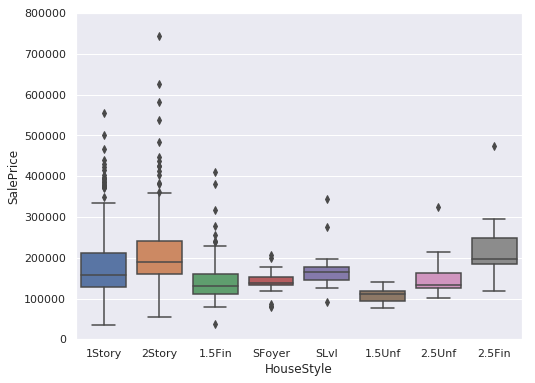

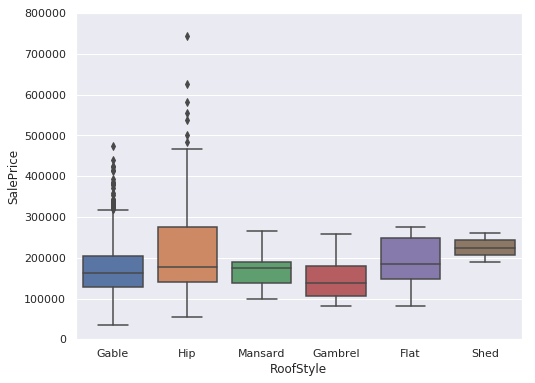

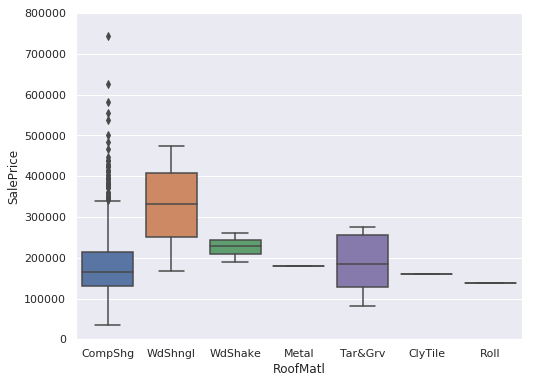

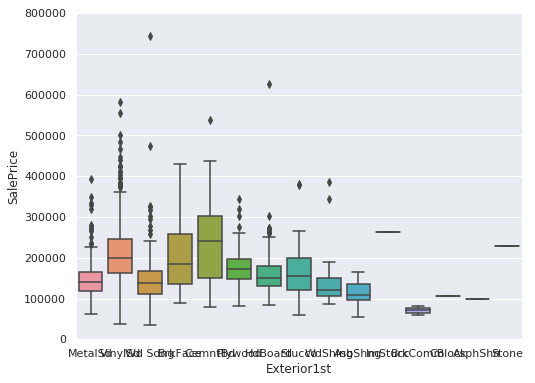

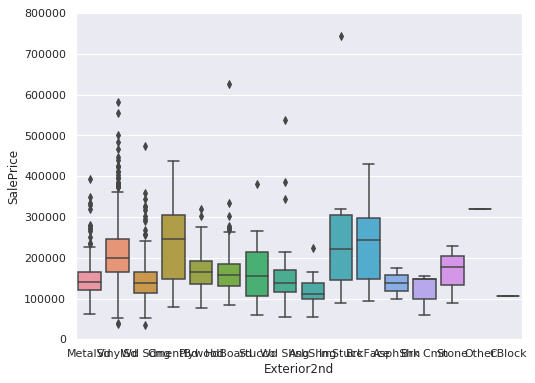

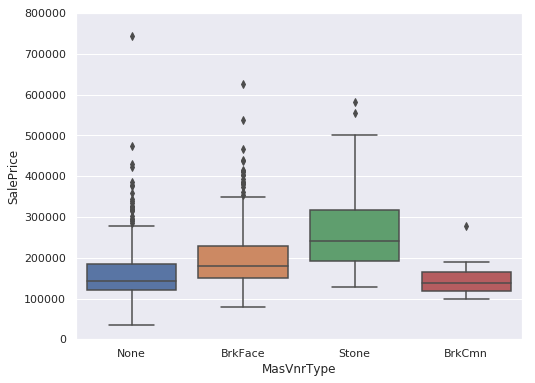

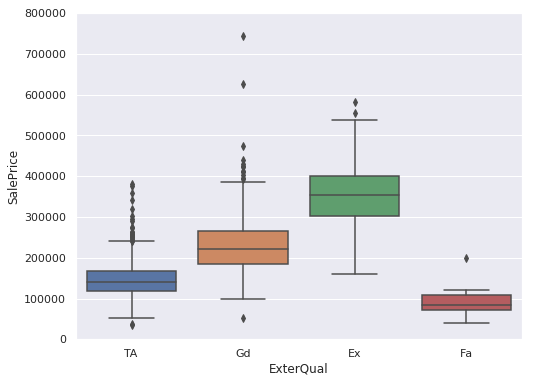

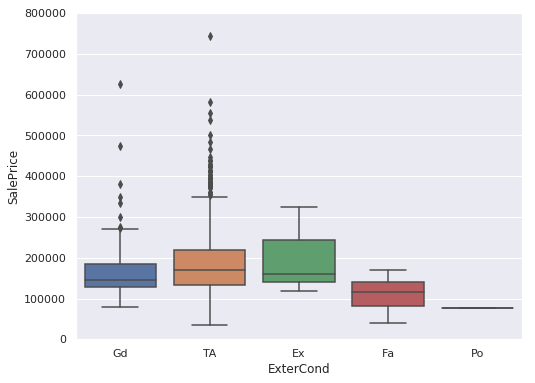

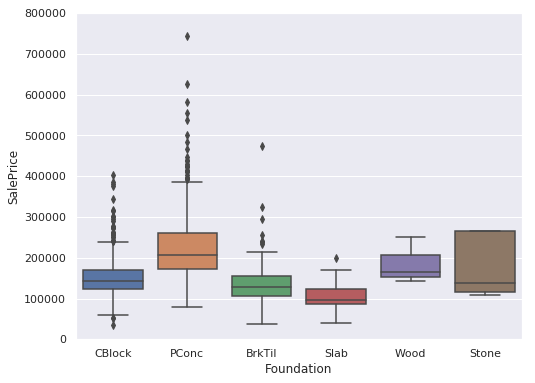

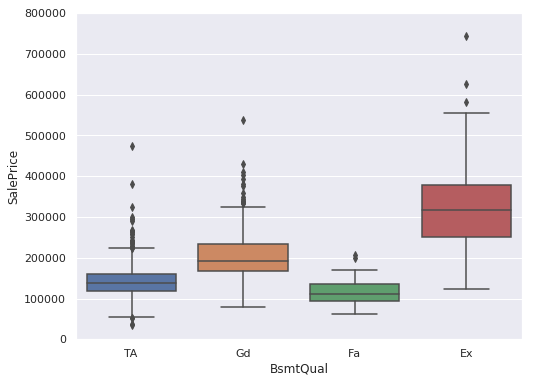

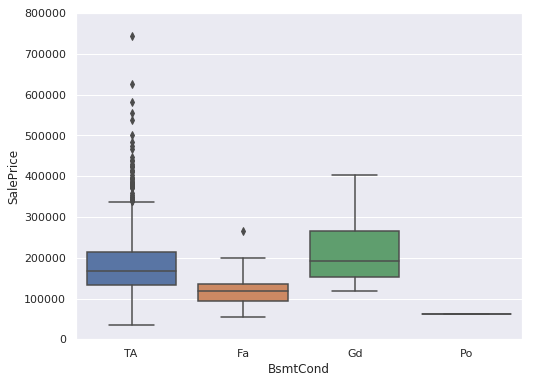

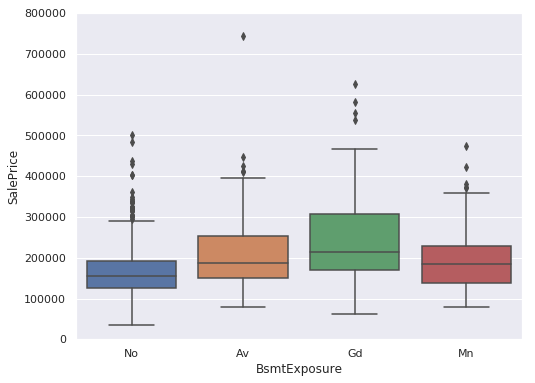

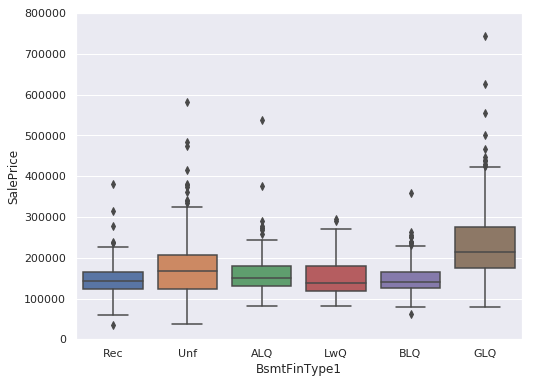

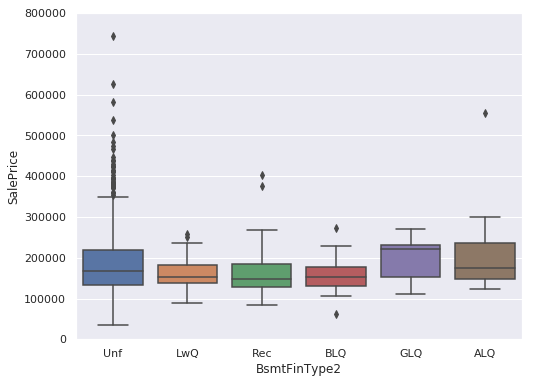

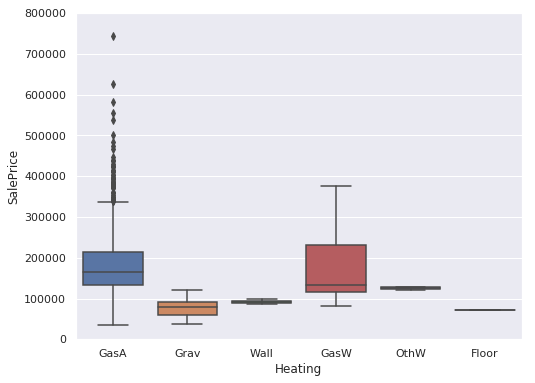

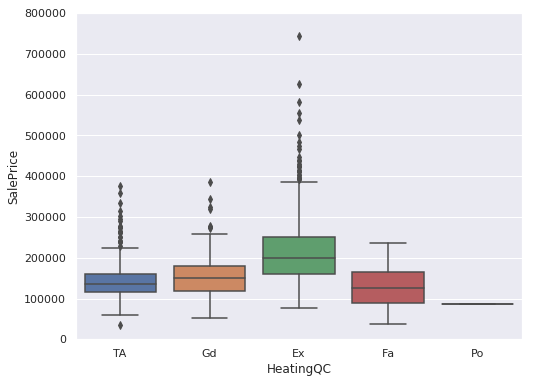

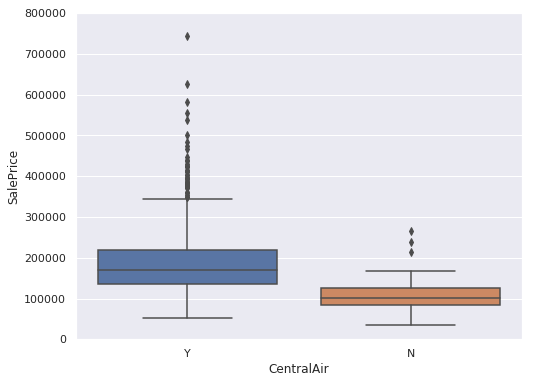

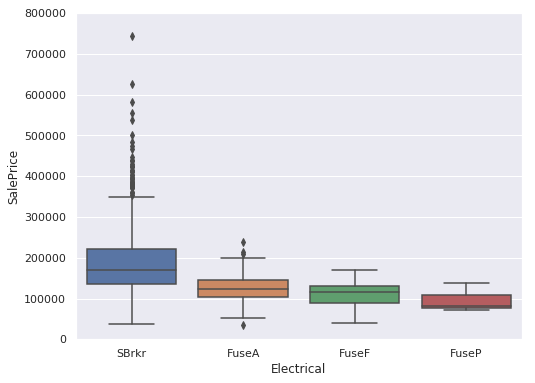

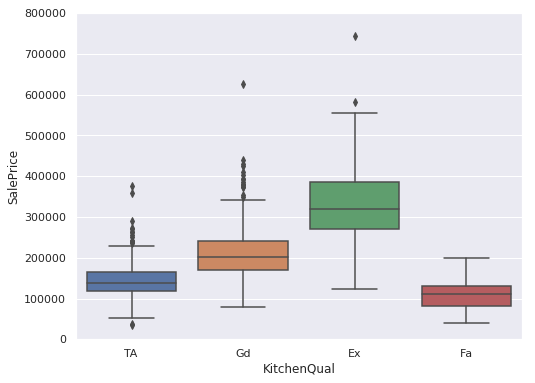

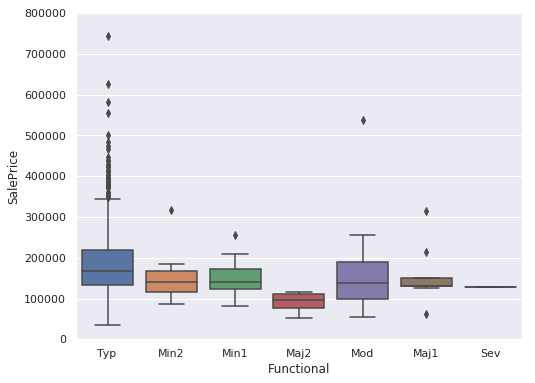

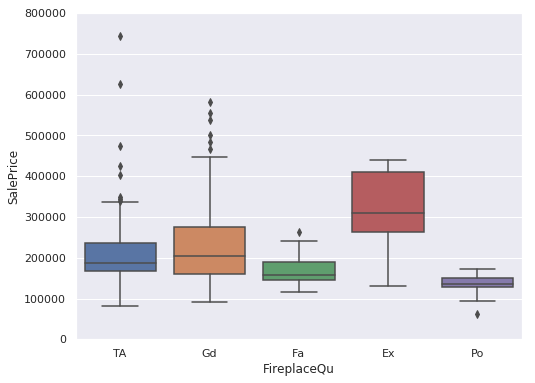

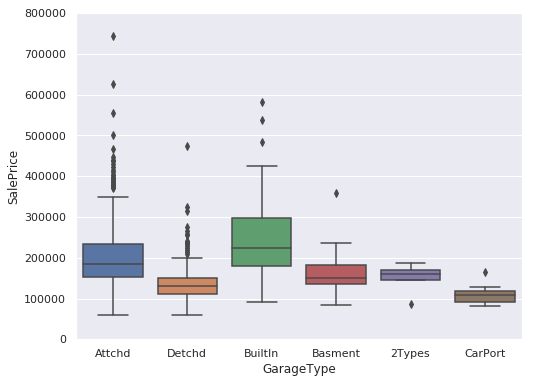

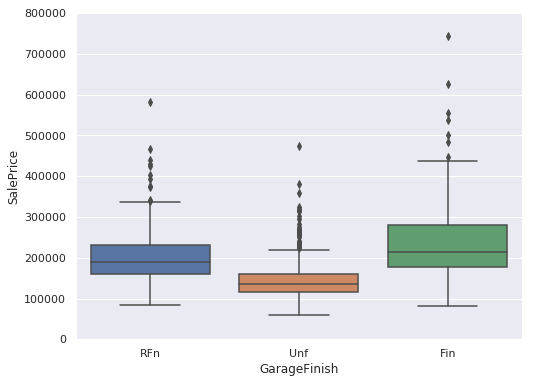

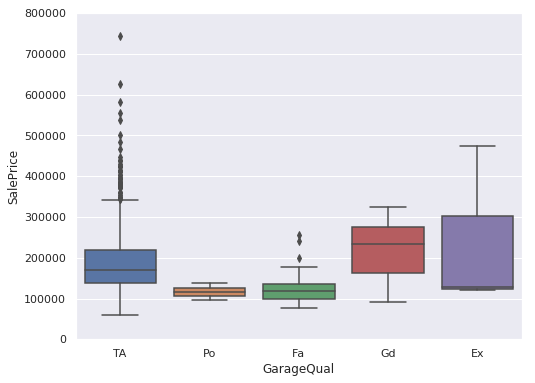

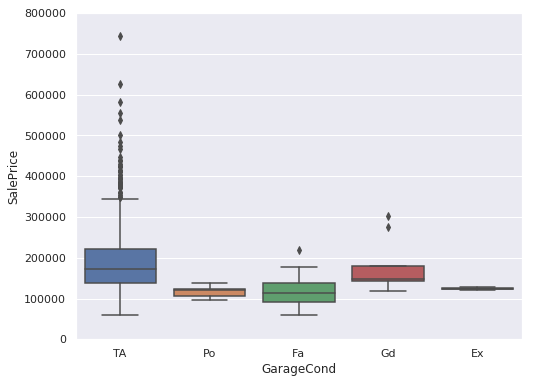

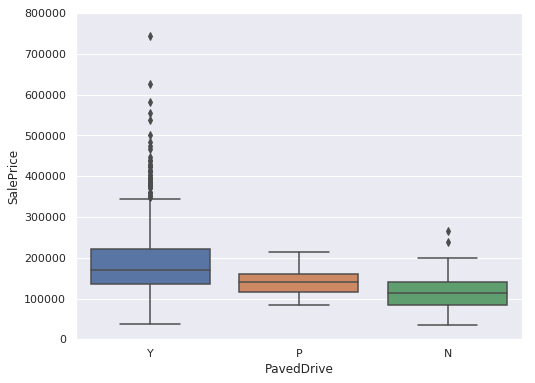

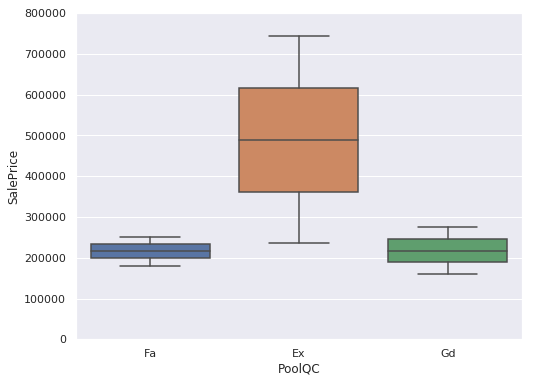

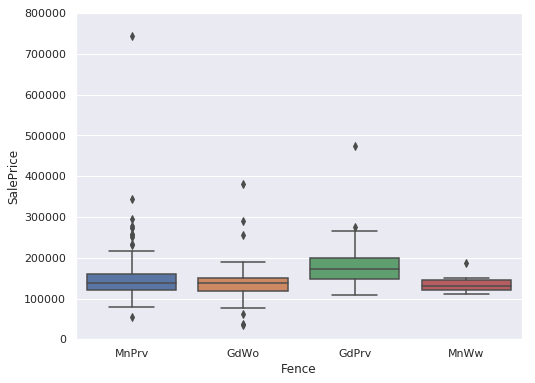

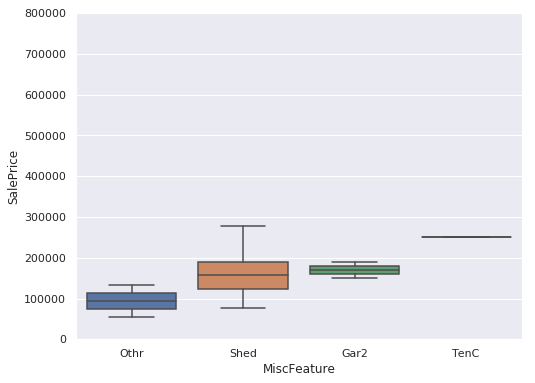

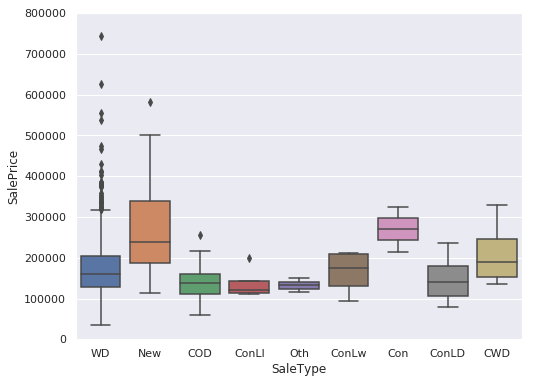

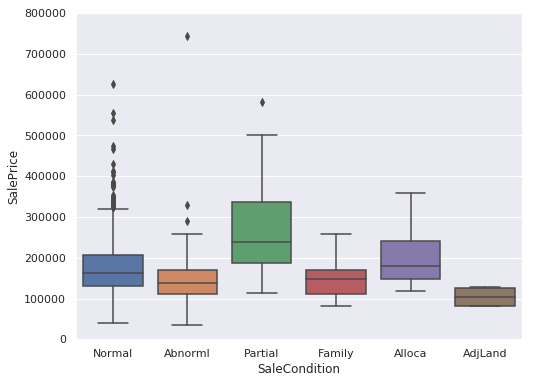

In [18]:
for var in categorical_feats:
    data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    fig.axis(ymin=0, ymax=800000);


From above it seems like
Overallqual
yearbuilt,Garageyrbuilt
IstFlsf
GrLivArea
GarageArea
Alley 
Exqual
are important features
and from most of box plots we see there are so many outliers in there which may not give good results
if we include them in model
and also there is cone shape in scatter plots indicating the hetroscedasticity (non-constant variance)
violation of assumption

In [19]:
del df_train['Id']
del df_test['Id']

In [20]:
numerical_feats=df_train.dtypes[df_train.dtypes!='object'].index

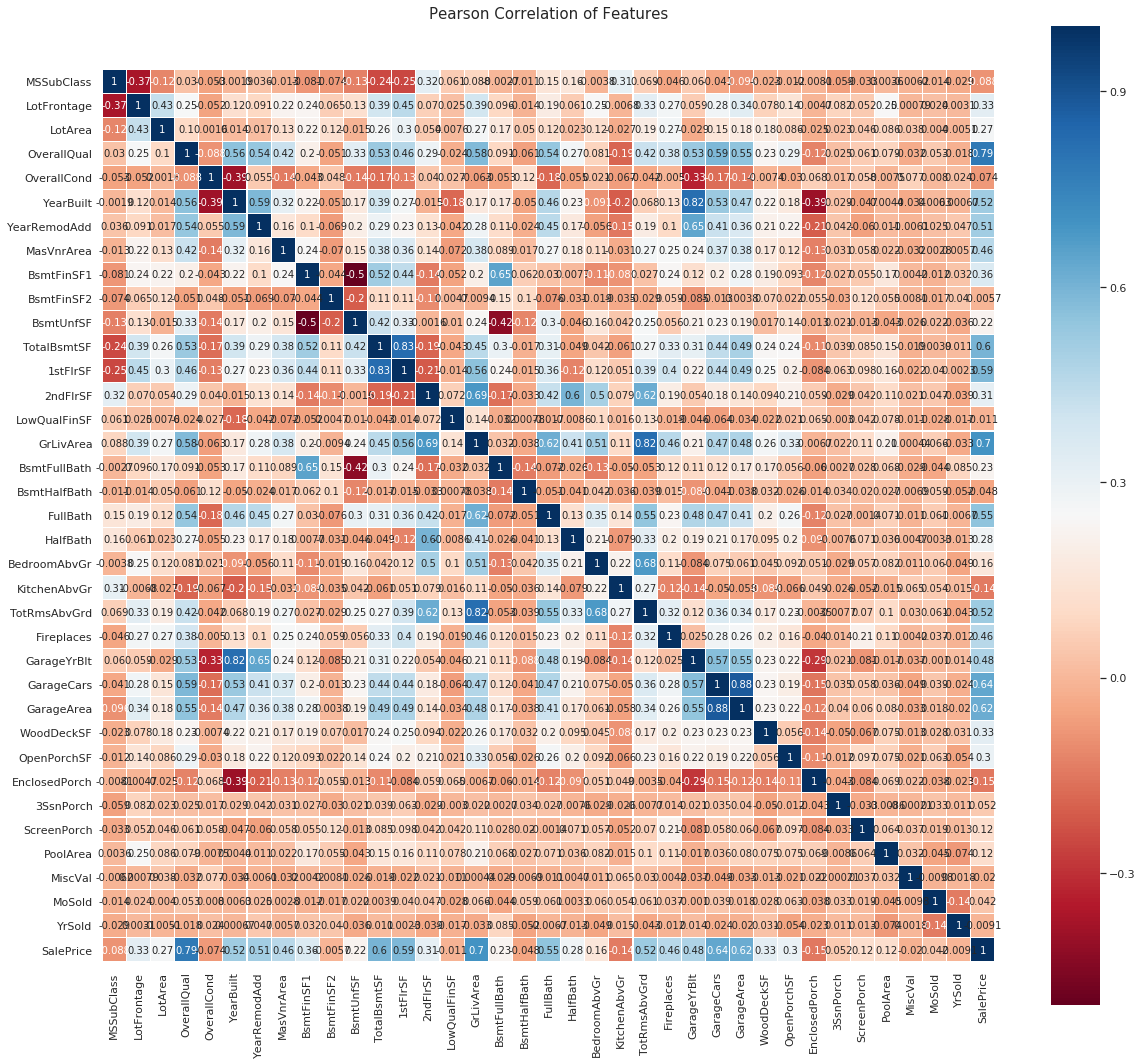

In [21]:
colormap = plt.cm.RdBu
plt.figure(figsize=(20,18))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_train.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [22]:
#Overallqual,yearbuilt,GrlivArea,GarageArea seems good variables from last row but there's whole mulicollinearity
#which causes standarad errors to become large and thus making variables insignificant which might be significant
#so we have to do feature selection and we have to solve the issue of multicollinearity

In [23]:
drop1=['MSSubClass','OverallCond','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','2ndFlrSF','TotalBsmtSF','BsmtFullBath',
      'BsmtHalfBath','HalfBath','BedroomAbvGr','WoodDeckSF','3SsnPorch','ScreenPorch','PoolArea',
      'MiscVal','MoSold','YrSold']
#we can keep only one from TotalBsmtSF and IstFlr Sf

In [24]:
for var in drop1:
    del df_train[var]
    del df_test[var]

In [25]:
df_train.shape

(1168, 62)

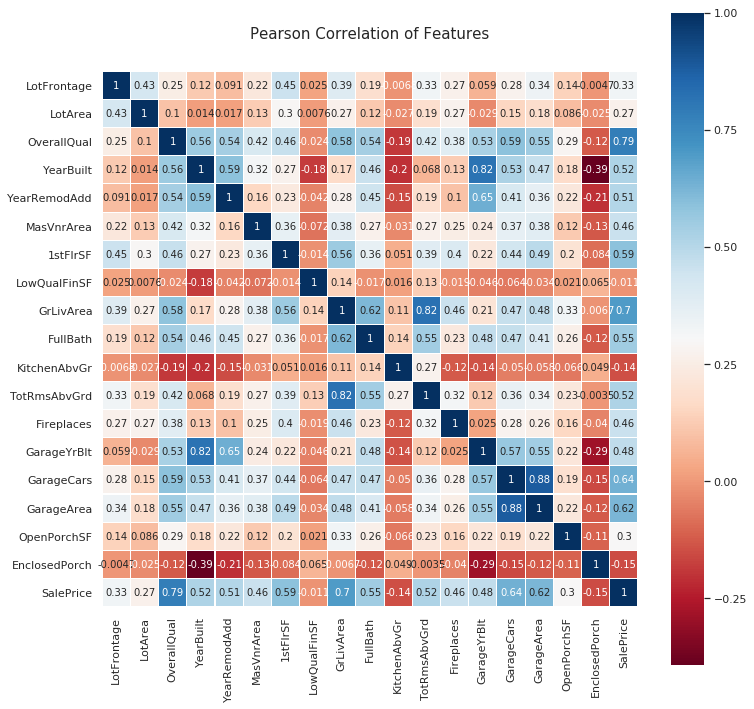

In [26]:
colormap = plt.cm.RdBu
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_train.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [27]:
#YearRemodAdd is correlated with other variables
drop2=['YearRemodAdd','LotFrontage','LotArea','LowQualFinSF','KitchenAbvGr','OpenPorchSF','EnclosedPorch']


In [28]:
for var in drop2:
    del df_train[var]
    del df_test[var]

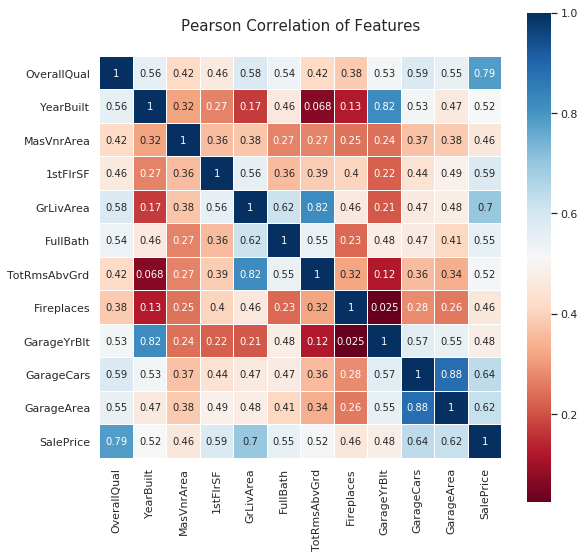

In [29]:
colormap = plt.cm.RdBu
plt.figure(figsize=(9,9))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_train.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [30]:
drop3=['GarageYrBlt']# add when re run'GarageArea','TotRmsAbvGrd
for var in drop3:
    del df_train[var]
    del df_test[var]
    

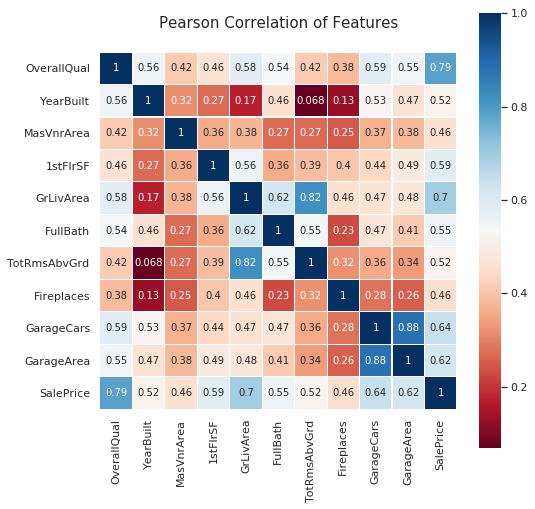

In [31]:
colormap = plt.cm.RdBu
plt.figure(figsize=(8,8))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_train.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [32]:
drop4=['TotRmsAbvGrd']#,'GarageArea','1stFlrSF','FullBath'  add this
for var in drop4:
    del df_train[var]
    del df_test[var]

In [33]:
drop5=['GarageArea','MasVnrArea','FullBath']#,  add this
for var in drop5:
    del df_train[var]
    del df_test[var]

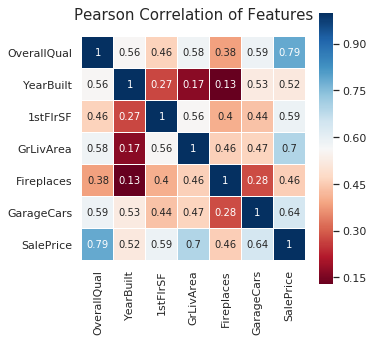

In [34]:
colormap = plt.cm.RdBu
plt.figure(figsize=(5,5))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_train.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [35]:
numerical_feats=df_train.dtypes[df_train.dtypes!='object']
numerical_feats

OverallQual    int64
YearBuilt      int64
1stFlrSF       int64
GrLivArea      int64
Fireplaces     int64
GarageCars     int64
SalePrice      int64
dtype: object

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


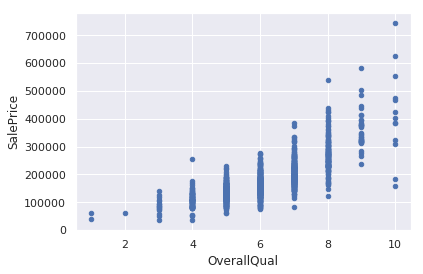

In [36]:
var='OverallQual'
data=pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice');

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


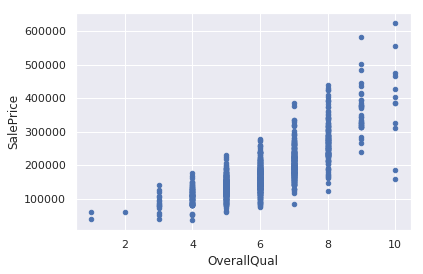

In [37]:
var='OverallQual'
df_train=df_train.drop(df_train[(df_train[var]==10) & (df_train['SalePrice']>700000)].index)
df_train=df_train.drop(df_train[(df_train[var]==4) & (df_train['SalePrice']>200000)].index)
df_train=df_train.drop(df_train[(df_train[var]==8) & (df_train['SalePrice']>500000)].index)

data=pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice');


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


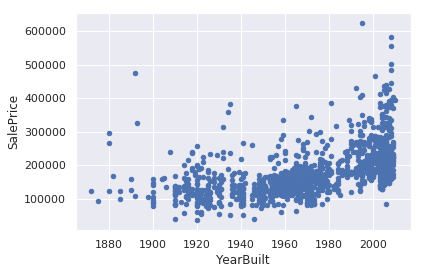

In [38]:
var='YearBuilt'
data=pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice');

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


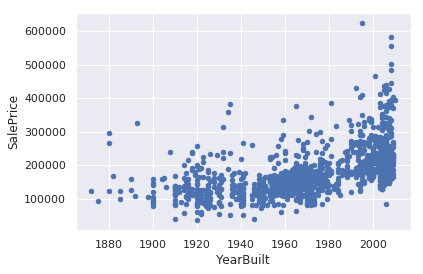

In [39]:
df_train=df_train.drop(df_train[(df_train['YearBuilt']<=1900) & (df_train['SalePrice']>400000)].index)
df_train=df_train.drop(df_train[(df_train['YearBuilt']<=1999) & (df_train['SalePrice']>700000)].index)
var='YearBuilt'
data=pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice');

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


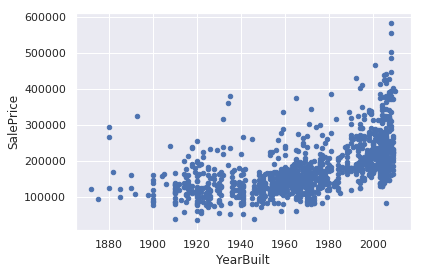

In [40]:
df_train=df_train.drop(df_train[(df_train['YearBuilt']<=1999) & (df_train['SalePrice']>600000)].index)
var='YearBuilt'
data=pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice');

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


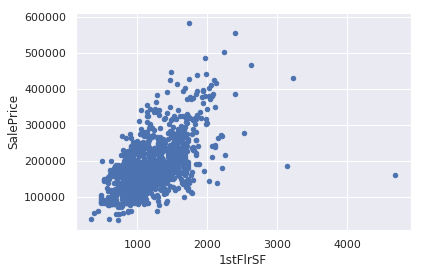

In [41]:
var='1stFlrSF'
data=pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice');

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


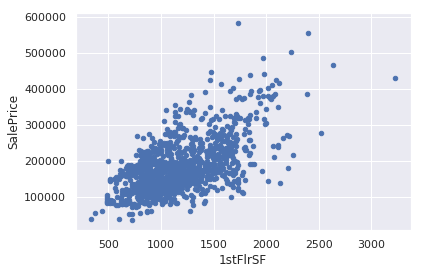

In [42]:
df_train=df_train.drop(df_train[(df_train['1stFlrSF']>3000) & (df_train['SalePrice']<400000)].index)
var='1stFlrSF'
data=pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice');

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


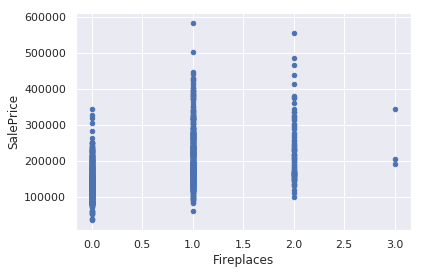

In [43]:
var='Fireplaces'
data=pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice');

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


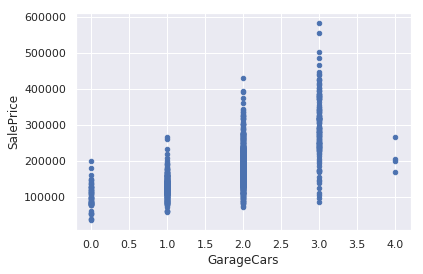

In [44]:
var='GarageCars'
data=pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice');

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


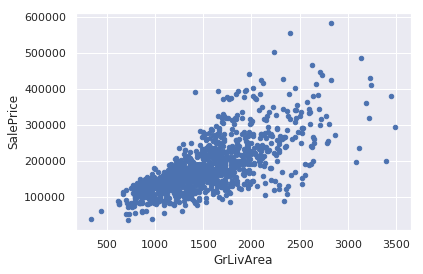

In [45]:
var='GrLivArea'
data=pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice');

In GrlivArea we clearly see the hetroscdasticity
so we need to use transformations before that let's check for missing data
and also categorical variables doesn't looks beneficial w.r.t to SalePrice so we will use only these six variables 
for modelling
and also there are some outliers which we can clearly see from scatterplot in GrLivArea vs SalePrice

In [46]:
df_train=df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<400000)].index)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


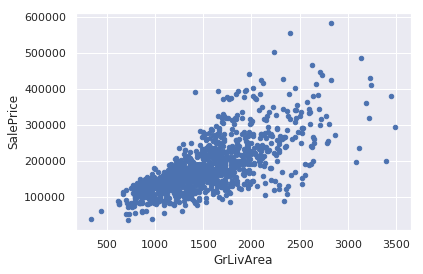

In [47]:
var='GrLivArea'
data=pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice');

#let's check if there's is any missing data

In [48]:
for var in categorical_feats:
    del df_train[var]
    del df_test[var]

In [49]:
total=df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
SalePrice,0,0.0
GarageCars,0,0.0
Fireplaces,0,0.0
GrLivArea,0,0.0
1stFlrSF,0,0.0
YearBuilt,0,0.0
OverallQual,0,0.0


In [50]:
df_train.shape

(1161, 7)

In [51]:
df_train.head()

,OverallQual,YearBuilt,1stFlrSF,GrLivArea,Fireplaces,GarageCars,SalePrice
254,5,1957,1314,1314,0,1,145000
1066,6,1993,799,1571,1,2,178000
638,5,1910,796,796,0,0,85000
799,5,1937,981,1768,2,1,175000
380,5,1924,1026,1691,1,1,127000


By now we have removed ouliers,removed collinear features,handeled missing data but what we have here is data 
which has variables on very different scale and we need to bring them on same scale 
and remember we have to do some transformations before we scale the data to make variables normally distributed

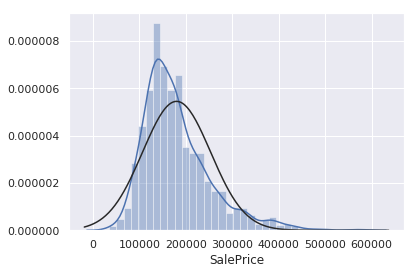

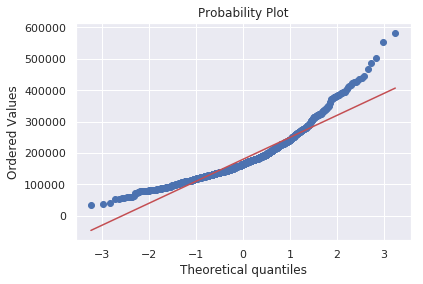

In [52]:
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

In [53]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])

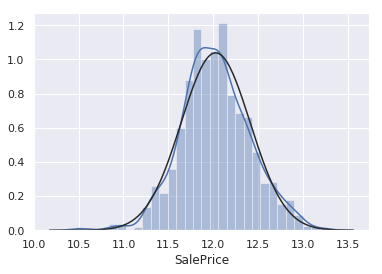

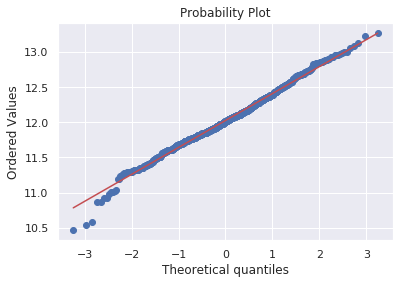

In [54]:
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

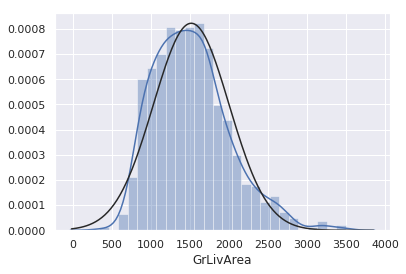

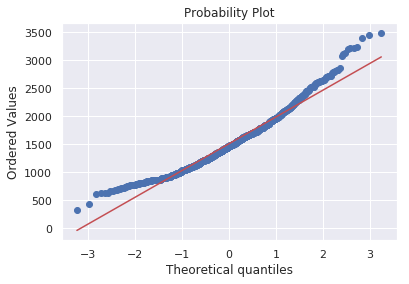

In [55]:
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

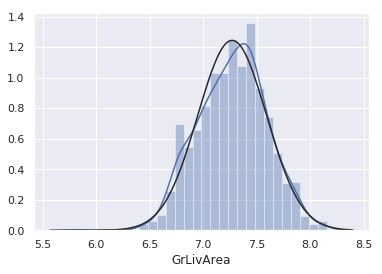

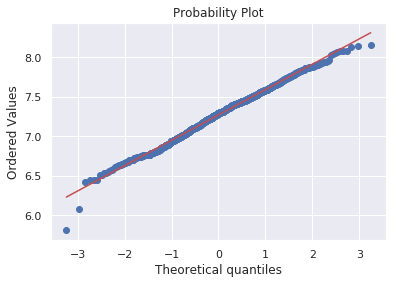

In [56]:
df_train['GrLivArea']=np.log(df_train['GrLivArea'])
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [57]:
df_train.head()

,OverallQual,YearBuilt,1stFlrSF,GrLivArea,Fireplaces,GarageCars,SalePrice
254,5,1957,1314,7.180831,0,1,11.884489
1066,6,1993,799,7.359468,1,2,12.089539
638,5,1910,796,6.679599,0,0,11.350407
799,5,1937,981,7.477604,2,1,12.072541
380,5,1924,1026,7.433075,1,1,11.751942


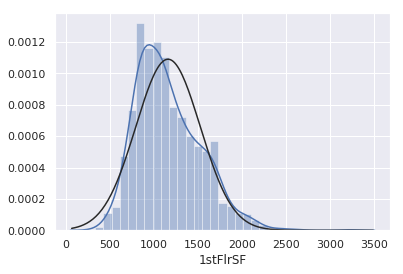

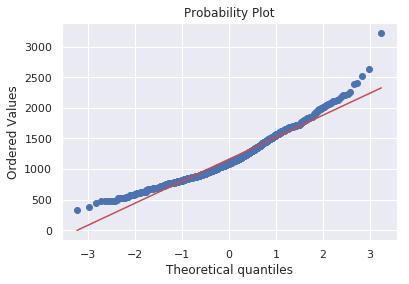

In [58]:
sns.distplot(df_train['1stFlrSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['1stFlrSF'], plot=plt)

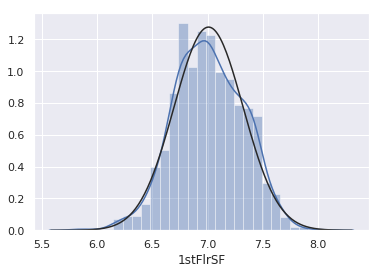

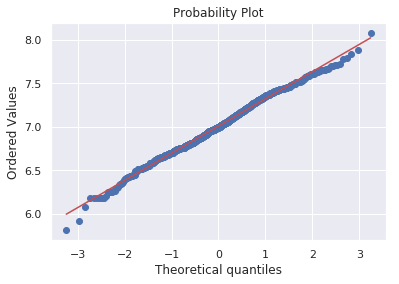

In [59]:
df_train['1stFlrSF']=np.log(df_train['1stFlrSF'])
sns.distplot(df_train['1stFlrSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['1stFlrSF'], plot=plt)

In [60]:
df_train.head()

,OverallQual,YearBuilt,1stFlrSF,GrLivArea,Fireplaces,GarageCars,SalePrice
254,5,1957,7.180831,7.180831,0,1,11.884489
1066,6,1993,6.683361,7.359468,1,2,12.089539
638,5,1910,6.679599,6.679599,0,0,11.350407
799,5,1937,6.888572,7.477604,2,1,12.072541
380,5,1924,6.933423,7.433075,1,1,11.751942


In [61]:
df_train.shape

(1161, 7)

In [62]:
df_test.head()

,OverallQual,YearBuilt,1stFlrSF,GrLivArea,Fireplaces,GarageCars,SalePrice
892,6,1963,1068,1068,0,1,154500
1105,8,1994,1500,2622,2,2,325000
413,5,1927,1028,1028,1,2,115000
522,6,1947,1004,1664,2,2,159000
1036,9,2007,1620,1620,1,3,315500


In [63]:
total=df_test.isnull().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
SalePrice,0,0.0
GarageCars,0,0.0
Fireplaces,0,0.0
GrLivArea,0,0.0
1stFlrSF,0,0.0
YearBuilt,0,0.0
OverallQual,0,0.0


In [64]:
df_test['GarageCars'].fillna(df_test['GarageCars'].mode(), inplace=True)

/home/sanjay/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [65]:
vars=['GrLivArea','1stFlrSF']
for var in vars:
    df_test[var]=np.log(df_test[var])

/home/sanjay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [66]:
df_test.head()

,OverallQual,YearBuilt,1stFlrSF,GrLivArea,Fireplaces,GarageCars,SalePrice
892,6,1963,6.973543,6.973543,0,1,154500
1105,8,1994,7.313220,7.871693,2,2,325000
413,5,1927,6.935370,6.935370,1,2,115000
522,6,1947,6.911747,7.416980,2,2,159000
1036,9,2007,7.390181,7.390181,1,3,315500


In [67]:
df_train.head()

,OverallQual,YearBuilt,1stFlrSF,GrLivArea,Fireplaces,GarageCars,SalePrice
254,5,1957,7.180831,7.180831,0,1,11.884489
1066,6,1993,6.683361,7.359468,1,2,12.089539
638,5,1910,6.679599,6.679599,0,0,11.350407
799,5,1937,6.888572,7.477604,2,1,12.072541
380,5,1924,6.933423,7.433075,1,1,11.751942


In [68]:
y_train=df_train['SalePrice']
y_test=df_test['SalePrice']


In [69]:
del df_train['SalePrice']
del df_test['SalePrice']



In [70]:
scaler = StandardScaler()
x_train= scaler.fit_transform(df_train)
x_test=scaler.fit_transform(df_test)

/home/sanjay/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/sanjay/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/sanjay/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/sanjay/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [71]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [72]:
lr.intercept_

12.025930619051174

In [73]:
lr.coef_

array([0.13136752, 0.08139045, 0.05746854, 0.11201406, 0.03667037,
       0.05203962])

In [74]:
y_pred=lr.predict(x_train)
y_pred1=lr.predict(x_test)

In [75]:
from sklearn.metrics import r2_score
print('Training r2')
r2_score(y_train, y_pred)

Training r2


0.841076153117423

In [76]:
y_test=np.log(y_test)

In [77]:
print('Testing r2')
r2_score(y_test, y_pred1)

Testing r2


0.8357144348301744

In [78]:
#see we have got good R-squared score on our regression problem using Linear Regression

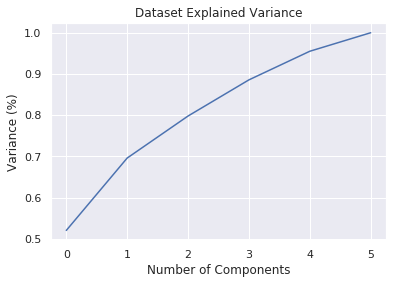

In [79]:
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA as sklearnPCA
pca = PCA().fit(x_train)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.show()

In [80]:
import statsmodels.api as sm
from statsmodels.graphics.gofplots import ProbPlot

In [81]:
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train).fit()

In [82]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     1018.
Date:                Tue, 30 Apr 2019   Prob (F-statistic):               0.00
Time:                        18:20:06   Log-Likelihood:                 530.69
No. Observations:                1161   AIC:                            -1047.
Df Residuals:                    1154   BIC:                            -1012.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.0259      0.005   2666.707      0.000      12.017      12.035
x1             0.1314      0.007     18.905      0.000       0.118       0.145
x2             0.0814      0.006     13.615      0.000       0.070       0.093
x3             0.0575      0.006     10.344      0.000       0.047       0.068
x4             0.1120      0.006     17.396      0.000       0.099       0.125
x5             0.0367      0.005      7.022      0.000       0.026       0.047
x6             0.0520      0.006      8.408      0.000       0.040       0.064
==============================================================================
Omnibus:                      165.036   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              451.166
Skew:                          -0.744   Prob(JB):                     1.07e-98
Kurtosis:                       5.667   Cond. No.                         3.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
#statistics tells us how much we are confident about our model
#Durbin-Watson: is 1.933(close to 2) which means reisduals are not correlated
#DW statistic ranges from 0 to 4 at 2 no correlation if b/w 0 to 2 then positively corelated
#if between 2 and 4 negatively correlated 
#you can also check SKEW value is close to zero because we transformed the variables to have normal distribution
#if variables are skewed then results of this will be bad

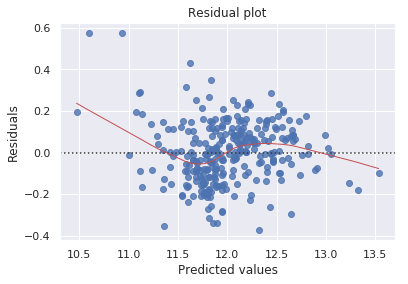

In [84]:
sns.residplot(y_test, y_pred1, lowess=True, line_kws={'color':'r', 'lw':1})
#sns.residplot(y_test,y_pred1)
plt.title('Residual plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals');

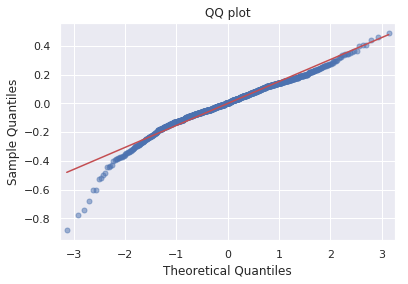

In [85]:
#to check whether the residuals are normally distributed yes they are normally distributed from the graph
#this is required for
QQ = ProbPlot(model.resid)
fig = QQ.qqplot(alpha=0.5, markersize=5, line='s')
plt.title('QQ plot');

/home/sanjay/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


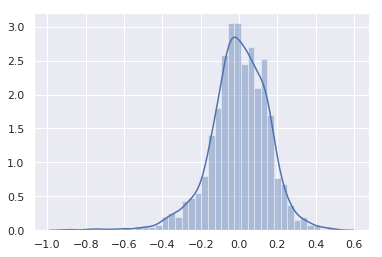

In [86]:
sns.distplot(np.array(model.resid), hist=True)

/home/sanjay/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
/home/sanjay/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')


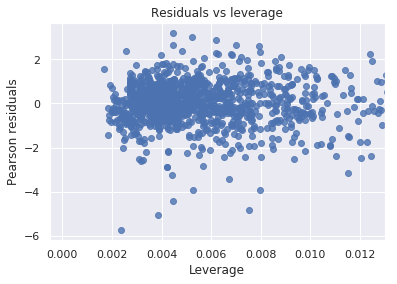

In [87]:
model_leverage = model.get_influence().hat_matrix_diag

# plot residuals vs high leverage points
sns.regplot(model_leverage, model.resid_pearson, fit_reg=False)
plt.xlim(xmin=-0.0005, xmax=0.013)
plt.xlabel('Leverage')
plt.ylabel("Pearson residuals")
plt.title("Residuals vs leverage");

It is also known as Cook’s Distance plot. Cook’s distance attempts to identify the pointswhich have more 
influence than other points. Such influential points tends to have a sizableimpact of the regression line.
In other words, adding or removing such points from the model can completely change the model statistics.

But, can these influential observations be treated as outliers? 
This question can only be answered after looking at the data. 
Therefore, in this plot,the large values marked by cook’s distance might require further investigation.


For influential observations which are nothing but outliers, if not many, you can remove those rows.

As we can see most of residuals are close to zero which are not are called high Leverage points

To overcome the issue of non-linearity, you can do a non linear transformation of predictors such as log (X), √X or X² transform the dependent variable. To overcome heteroskedasticity, a possible way is to transform the response variable such as log(Y) or √Y. Also, you can use weighted least square method to tackle heteroskedasticity

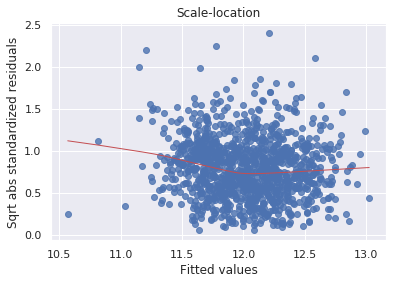

In [88]:
#hetroscedasticity test
# normalised residuals
model_norm_resid = model.get_influence().resid_studentized_internal

# absolute squared normalised residuals
model_norm_resid_abs_sqrt = np.sqrt(np.abs(model_norm_resid))

# plot scale-location
sns.regplot(model.fittedvalues, model_norm_resid_abs_sqrt, lowess=True, line_kws={'color':'r', 'lw':1})
plt.xlabel('Fitted values')
plt.ylabel('Sqrt abs standardized residuals')
plt.title('Scale-location');


It shows how the residual are spread along the range of predictors. 
It’s similar to residual vs fitted value plot except it uses standardized residual values. 
Ideally, there should be no discernible pattern in the plot. 

What if these assumptions get violated ?

1.Linear and Additive:  If you fit a linear model to a non-linear, non-additive data set, the regression algorithm would fail to capture the trend mathematically, thus resulting in an inefficient model. Also, this will result in erroneous predictions on an unseen data set.

2.Autocorrelation:The presence of correlation in error terms drastically reduces model’s accuracy. This usually occurs in time series models where the next instant is dependent on previous instant. If the error terms are correlated, the estimated standard errors tend to underestimate the true standard error.

If this happens, it causes confidence intervals and prediction intervals to be narrower. Narrower confidence interval means that a 95% confidence interval would have lesser probability than 0.95 that it would contain the actual value of coefficients.

HOW TO CHECK?
Look for Durbin – Watson (DW) statistic. It must lie between 0 and 4. If DW = 2, implies no autocorrelation, 0 < DW < 2 implies positive autocorrelation while 2 < DW < 4 indicates negative autocorrelation.


3.Multicollinearity: This phenomenon exists when the independent variables are found to be moderately or highly correlated. In a model with correlated variables, it becomes a tough task to figure out the true relationship of a predictors with response variable. In other words, it becomes difficult to find out which variable is actually contributing to predict the response variable.

Another point, with presence of correlated predictors, the standard errors tend to increase. And, with large standard errors, the confidence interval becomes wider leading to less precise estimates of slope parameters.

Also, when predictors are correlated, the estimated regression coefficient of a correlated variable depends on which other predictors are available in the model. If this happens, you’ll end up with an incorrect conclusion that a variable strongly / weakly affects target variable. Since, even if you drop one correlated variable from the model, its estimated regression coefficients would change. That’s not good!

How to check: You can use scatter plot to visualize correlation effect among variables. Also, you can also use VIF factor. VIF value <= 4 suggests no multicollinearity whereas a value of >= 10 implies serious multicollinearity. Above all, a correlation table should also solve the purpose.

4.Heteroskedasticity: The presence of non-constant variance in the error terms results in heteroskedasticity. Generally, non-constant variance arises in presence of outliers or extreme leverage values. Look like, these values get too much weight, thereby disproportionately influences the model’s performance. When this phenomenon occurs, the confidence interval for out of sample prediction tends to be unrealistically wide or narrow.


5.Normal Distribution of error terms: If the error terms are non- normally distributed, confidence intervals may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares. Presence of non – normal distribution suggests that there are a few unusual data points which must be studied closely to make a better model.

How to check: You can look at QQ plot




